### Tax Returns Credit Breakdown Luke Work

In [39]:
#gauss won't let me save in TaxReturnsCreditBreakDown, doing work here
#note to self-try education tax credit possibly

## Types of Tax Credits
A tax credit takes the amount off the total final tax bill, instead of deducting it from your taxable income.

| Number Filed (Col) | Amount Filed (Col) | Form | Type of Return | Description |
| --- | --- | --- | --- | --- |
| `N07230` | `A07230` | Schedule 3 | Education | $2,500 per student, used toward course materials and tuition |
| `N07240` | `A07240` | Schedule 3 | Retirement Savings Contribution | 20% of contributions to a qualifying retirement plans |
| `N85770` | `A85770` | 8962 | Insurence Premium | Monthly insurance payment when enrolled in specific plans |
| `N07180` | `A07180` | Schedule 3 | Child/Dependent Care | Children under 13, or dependents who are unable to take care of them self |
| `N07225` | `A07225` | 1040 | w/ Child/Dependent | Having any child under 18 or dependent |
| `N07300` | `A07300` | Schedule 3 | w/ Foreign Tax | Having any taxes imposed on you by a foreign country |
| `N11070` | `A11070` | 1040 | w/ Additional Child | Having 3 or more children |
| `N07260` | `A07260` | Schedule 3 | w/ Residential Energy | Energy efficiency improvements |
| `N09400` | `A09400` | Schedule 3 | w/ Self-Employment | Being self-employed |
| `N10960` | `A10960` | 1040 | w/ Refundable Education | Having to cover the cost of higher education |
| `N11450` | `A11450` | Schedule 3 | w/ Sick/Family Leave | Having to take leave from job for sickness or family reasons |
| `N10970` | `A10970` | 1040 | w/ Recovery Rebate | Anyone one with income less than \$75K for 2021  |



## Info To Find
And make some charts, and anything else you want to review
(Delete these notes when complete)
 - total $ amount -DID SO by Josh
 
 - total $ amount, by credit type
 
 - total $ amount, by tax bracket -DID SO by Josh
 
 - total $ amount, by credit type, by tax bracket

In [40]:
TAX_CREDIT_AMT  = [ "A07225", "A11070", "A10960", "A10970", "A07230", "A07240", "A85770", "A07180", "A07300", "A07260", "A09400", "A11450", "A11560" ]
TAX_CREDIT_NUM  = [ "N07225", "N11070", "N10960", "N10970", "N07230", "N07240","N85770", "N07180", "N07300", "N07260", "N09400", "N11450", "N11560" ]

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

In [42]:
df = pd.read_csv("./data/tax_data_2020.csv")
df = df[df.zipcode != 0]

In [43]:
def toMillion(amount):
    return round(amount / 1000000, 2)

def toBillion(amount):
    return round(amount / 1000000000, 2)

def toTrillion(amount):
    return round(amount / 1000000000000, 10)

### Initial Tax Credit Exploration

In [44]:
creditByTaxBracket = df.groupby('agi_stub')[TAX_CREDIT_AMT].sum()
creditByTaxBracket

,A07225,A11070,A10960,A10970,A07230,A07240,A85770,A07180,A07300,A07260,A09400,A11450,A11560
agi_stub,,,,,,,,,,,,,
1,1115635.0,12440779.0,1911061.0,18575709.0,785537.0,344389.0,15077522.0,44731.0,9697.0,14497.0,9456899.0,602488.0,860478.0
2,14951003.0,15865479.0,1337258.0,8027248.0,2609167.0,1144185.0,11100566.0,664627.0,60143.0,306384.0,8878458.0,412745.0,662673.0
3,16466426.0,3433735.0,722944.0,4383574.0,1510657.0,246002.0,2546206.0,404364.0,115745.0,550610.0,6721324.0,175812.0,96287.0
4,13901063.0,518995.0,468202.0,2740478.0,1007249.0,0.0,170359.0,345300.0,137510.0,479735.0,5342967.0,72158.0,1183.0
5,27241973.0,50835.0,1030291.0,5900588.0,1803549.0,0.0,2152.0,875315.0,711611.0,1212207.0,13677333.0,153746.0,0.0
6,9661820.0,63.0,0.0,14003.0,0.0,0.0,0.0,397114.0,10092080.0,619033.0,20392362.0,46311.0,0.0


<AxesSubplot: xlabel='agi_stub'>

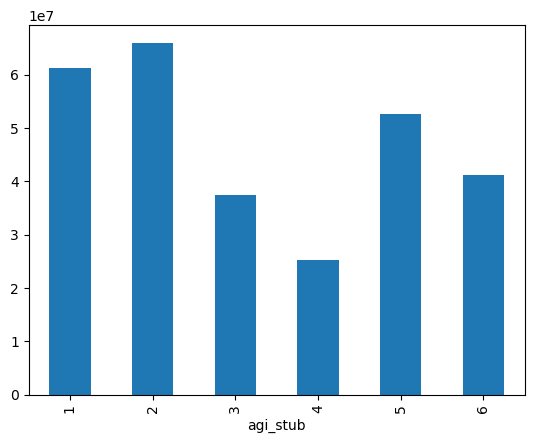

In [45]:
creditByTaxBracket.sum(axis=1).plot.bar()

In [46]:
toBillion(creditByTaxBracket.sum(axis=1)*1000)

agi_stub
1    61.24
2    66.02
3    37.37
4    25.19
5    52.66
6    41.22
dtype: float64

It seems that the two lowest income brackets have both the highest amounts of $ from tax credits, and the two highet income brackets have the most amount of money from tax credits. These are important considerations for desigining a new tax code. The poorest get around 127 billion dollars in tax credits while rich people get around 94 billion dollars in tax credits.

<AxesSubplot: xlabel='agi_stub'>

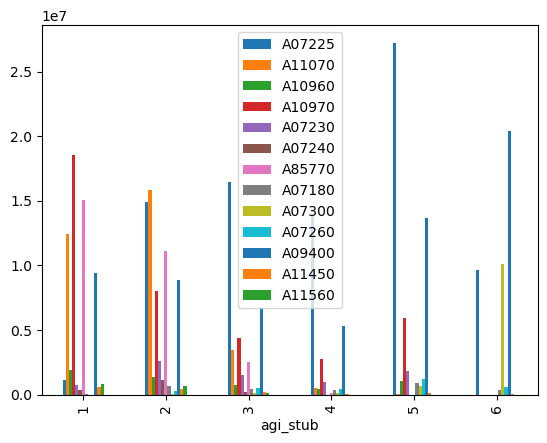

In [47]:
creditByTaxBracket.plot.bar()

From an initial look at the data, it looks like the top income bracket (people with >$200,000 annual income) has a relatively great amount of money from self employed tax credits compared to their other tax credits since that is the tax credit they have the most money from. Perhaps this is from top income bracket setting up their own buisnesses with their greater wealth from the larger income. I can't tell what tax credit the very big purple bar for 5 is referring to, so I will try to guess what that is and focus on that next.

Luke Note: The reason the highest income bracket has so much from the self employed tax credit is due to the fact that the people who are self employed, generally make a lot more moneey than any other average person. A business requires money, however it is not the same as being self employed, which generally doesn't cost too much (anyone can make a company). Also it appears that insurance premiums have a disproportionately large affect on the lower tax brackets compared to the upper ones, meaning insurance premiums likely happen much more to the lower tax bracket people.

### Child Dependent Tax Credit Exploration

In [48]:
toBillion(creditByTaxBracket['A07225']*1000)

agi_stub
1     1.12
2    14.95
3    16.47
4    13.90
5    27.24
6     9.66
Name: A07225, dtype: float64

The upper tax brackets makes relatively massive amounts of money from child dependent tax credits compared to the other tax brackets. Surpisingly, the lowest bracket and less so the top tax bracket have an extremely low amount of money from child dependent tax credits. I am more surpised by the lowest tax bracket result. Perhaps this indicates they don't have lots of kids?

Luke Note: I believe it is true that lower income people generally do not have as many kids since being in that range makes raising children quite difficult. However you must realize that generally speaking these, lower income individuals might not even be in their 30s or late 20s which is generally when kids happen. If they were they probably would have gotten raises even if their job had little pay.

<AxesSubplot: xlabel='agi_stub'>

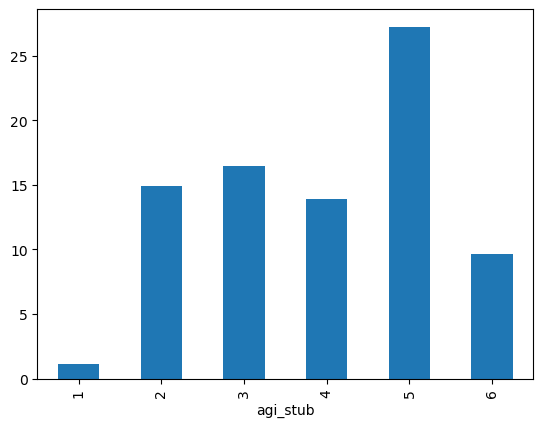

In [49]:
toBillion(creditByTaxBracket['A07225']*1000).plot.bar()

graph for visual reference

Let's focus on the second lowest tax bracket's credits next

## Second Lowest Bracket Tax Credits

In [50]:
poorTaxCredits = creditByTaxBracket.loc[[2]]
poorTaxCredits*1000

,A07225,A11070,A10960,A10970,A07230,A07240,A85770,A07180,A07300,A07260,A09400,A11450,A11560
agi_stub,,,,,,,,,,,,,
2,1.495100e+10,1.586548e+10,1.337258e+09,8.027248e+09,2.609167e+09,1.144185e+09,1.110057e+10,664627000.0,60143000.0,306384000.0,8.878458e+09,412745000.0,662673000.0


In [51]:
toBillion(poorTaxCredits*1000)

,A07225,A11070,A10960,A10970,A07230,A07240,A85770,A07180,A07300,A07260,A09400,A11450,A11560
agi_stub,,,,,,,,,,,,,
2,14.95,15.87,1.34,8.03,2.61,1.14,11.1,0.66,0.06,0.31,8.88,0.41,0.66


The second lowest bracket gets over 15.87 billion dollars from the additional child tax credit, the tax credit they have the most money from, while having only 60 million dollars from foreign tax credits. Also, they make over 14.95 billion dollars from child dependent tax credits. It seems that poor people have a bunch more children per household then 3 and very few poor households pay foreign taxes. When designing a new tax code Congress should not get rid of the child dependent or additional child tax credits it seems to avoid severly hurting these people.

<AxesSubplot: xlabel='agi_stub'>

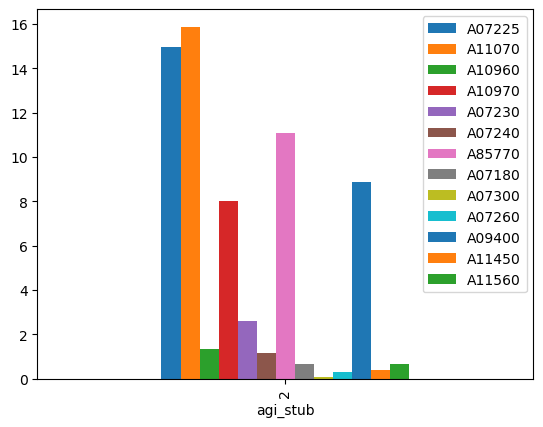

In [52]:
toBillion(poorTaxCredits*1000).plot.bar()

graph for visual reference

Let's focus on very poor people next.

## Lowest Tax Bracket Tax Credits

In [53]:
veryPoorTaxCredits = creditByTaxBracket.loc[[1]]
veryPoorTaxCredits*1000

,A07225,A11070,A10960,A10970,A07230,A07240,A85770,A07180,A07300,A07260,A09400,A11450,A11560
agi_stub,,,,,,,,,,,,,
1,1.115635e+09,1.244078e+10,1.911061e+09,1.857571e+10,785537000.0,344389000.0,1.507752e+10,44731000.0,9697000.0,14497000.0,9.456899e+09,602488000.0,860478000.0


In [54]:
toBillion(veryPoorTaxCredits*1000)

,A07225,A11070,A10960,A10970,A07230,A07240,A85770,A07180,A07300,A07260,A09400,A11450,A11560
agi_stub,,,,,,,,,,,,,
1,1.12,12.44,1.91,18.58,0.79,0.34,15.08,0.04,0.01,0.01,9.46,0.6,0.86


The lowest bracket gets over 18.58 billion dollars from recovery rebate tax credits. This does make sense given the definition of the recovery rebate tax credit. They also do not have much retirement savings it seems and apparently do not get much foreign tax paid credits or education tax credits or residental energy tax credits. They make 15.08 billion from the insurance premium tax credits, making it appear they deal with insurance premiums a lot. They do make over 12.44 billion dollars from the additional child tax credit. This is surprising given that they apparently make relatively little money from the child dependent tax credit. It seems that they actually have a bunch of children over 3 in their households. It looks like that Congress should not abolish the additional children tax credit when designing a new tax code to avoid severely hurting them. 

Luke Note: I'm no expert but I've heard that there is a lot of fradulent tax credit claims regarding additional child tax credits which could account for the great amount coming from the additional children tax credit.

<AxesSubplot: xlabel='agi_stub'>

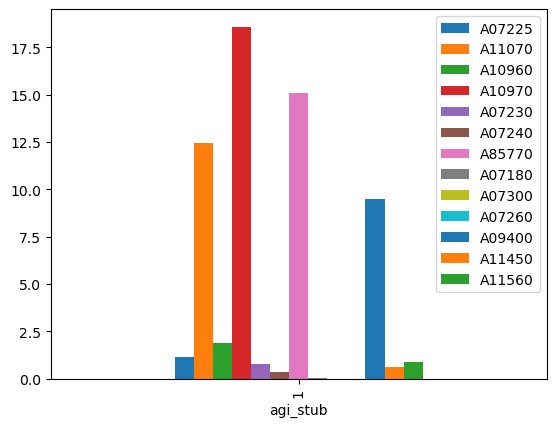

In [55]:
toBillion(veryPoorTaxCredits*1000).plot.bar()

graph for visual reference

Let's focus on the top bracket next

## Highest Bracket Tax Credits

In [56]:
veryRichTaxCredits = creditByTaxBracket.loc[[6]]
veryRichTaxCredits*1000

,A07225,A11070,A10960,A10970,A07230,A07240,A85770,A07180,A07300,A07260,A09400,A11450,A11560
agi_stub,,,,,,,,,,,,,
6,9.661820e+09,63000.0,0.0,14003000.0,0.0,0.0,0.0,397114000.0,1.009208e+10,619033000.0,2.039236e+10,46311000.0,0.0


In [57]:
toBillion(veryRichTaxCredits*1000)

,A07225,A11070,A10960,A10970,A07230,A07240,A85770,A07180,A07300,A07260,A09400,A11450,A11560
agi_stub,,,,,,,,,,,,,
6,9.66,0.0,0.0,0.01,0.0,0.0,0.0,0.4,10.09,0.62,20.39,0.05,0.0


The top bracket makes over 20.39 billion dollars from the self employed tax credit as explained above. They also make over 10.09 billion dollars from the foreign tax paid credit (probably from lots of them probably also being foreign nationals or something similar) and 9.66 billion dollars from the child dependent tax credit. They make relatively very little money from the other tax credits, however. It seems that if Congress wants to not hurt them when designing a new tax code, they should not get rid of the self-employed tax credit or the foreign tax paid credit or the child dependent tax credit.

<AxesSubplot: xlabel='agi_stub'>

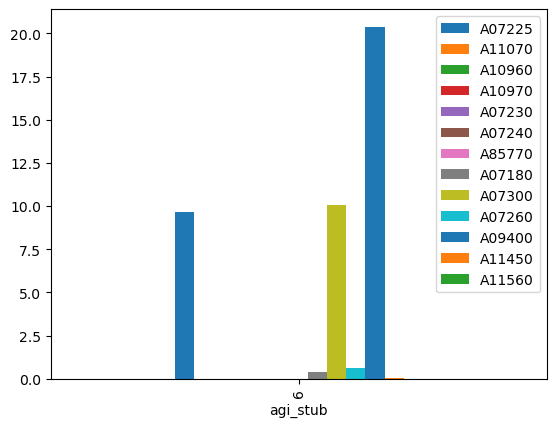

In [58]:
toBillion(veryRichTaxCredits*1000).plot.bar()

graph for visual reference

Let's focus on the second highest tax bracket next

## Second Highest Tax Bracket Tax Credits

In [59]:
richTaxCredits = creditByTaxBracket.loc[[5]]
richTaxCredits*1000

,A07225,A11070,A10960,A10970,A07230,A07240,A85770,A07180,A07300,A07260,A09400,A11450,A11560
agi_stub,,,,,,,,,,,,,
5,2.724197e+10,50835000.0,1.030291e+09,5.900588e+09,1.803549e+09,0.0,2152000.0,875315000.0,711611000.0,1.212207e+09,1.367733e+10,153746000.0,0.0


In [60]:
toBillion(richTaxCredits*1000)

,A07225,A11070,A10960,A10970,A07230,A07240,A85770,A07180,A07300,A07260,A09400,A11450,A11560
agi_stub,,,,,,,,,,,,,
5,27.24,0.05,1.03,5.9,1.8,0.0,0.0,0.88,0.71,1.21,13.68,0.15,0.0


The second highest tax bracket makes over 27.24 billion dollars from the child dependent tax credit and over 13.68 billion dollars from the self-employed tax credit and around 5.9 billion dollars from the recovery rebate tax credit. The recovery rebate finding is surprising, as these people are supposed to make 100,000 to 200,000 annual income according to the data documentation. Covid-19 probably accounts for this, however. They also make relatively little money from the other tax credits. It seems that if Congress wants to not hurt them when designing a new tax code, they should not get rid of the child-dependent tax credit or the self-employed tax credit or the recovery rebate tax credit. 

<AxesSubplot: xlabel='agi_stub'>

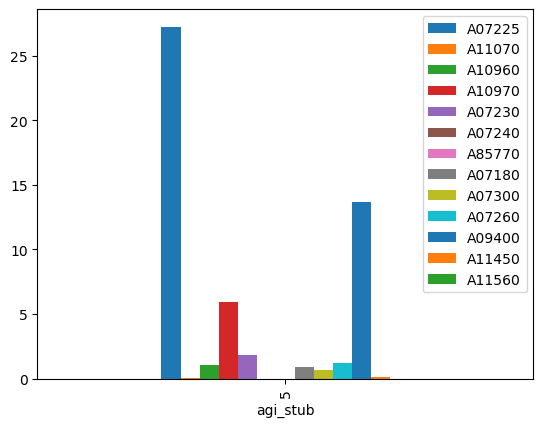

In [61]:
toBillion(richTaxCredits*1000).plot.bar()

graph for visual reference

Let's focus on somewhat-rich people (people with 75k to 100k dollar annual incomes) next.

## Third Highest Tax Bracket Tax Credits

In [62]:
somewhatRichTaxCredits = creditByTaxBracket.loc[[4]]
somewhatRichTaxCredits*1000

,A07225,A11070,A10960,A10970,A07230,A07240,A85770,A07180,A07300,A07260,A09400,A11450,A11560
agi_stub,,,,,,,,,,,,,
4,1.390106e+10,518995000.0,468202000.0,2.740478e+09,1.007249e+09,0.0,170359000.0,345300000.0,137510000.0,479735000.0,5.342967e+09,72158000.0,1183000.0


In [63]:
toBillion(somewhatRichTaxCredits*1000)

,A07225,A11070,A10960,A10970,A07230,A07240,A85770,A07180,A07300,A07260,A09400,A11450,A11560
agi_stub,,,,,,,,,,,,,
4,13.9,0.52,0.47,2.74,1.01,0.0,0.17,0.35,0.14,0.48,5.34,0.07,0.0


The third highest tax bracket people make over 13.9 billion dollars from the child dependent tax credit. They make around 5.34 billion dollars from the self-employed tax credit. They make around 2.74 billion dollars from the recovery rebate tax credit. They make relatively little money from the other tax credits. It seems that if Congress wants to not hurt these people when designing a new tax code, they should not get rid of the child dependent tax credit or the self-employed tax credit or the recovery rebate tax credit, htough the most important one is by far the self-employed tax credit.

<AxesSubplot: xlabel='agi_stub'>

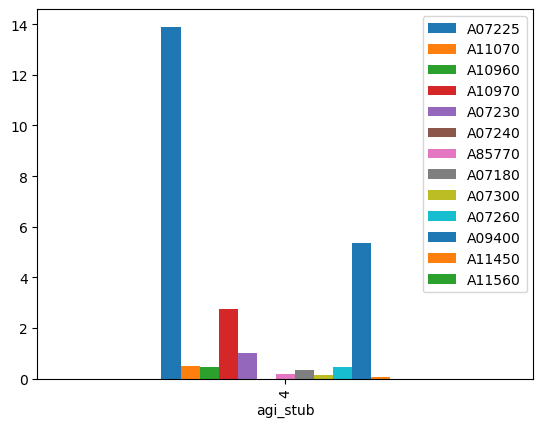

In [64]:
toBillion(somewhatRichTaxCredits*1000).plot.bar()

graph for visual reference

Let's focus on the third lowest bracket (people with 50k to 75k dollar annual incomes) next.

## Third Lowest Bracket Tax Credits

In [65]:
mediumPeopleTaxCredits = creditByTaxBracket.loc[[3]]
mediumPeopleTaxCredits*1000

,A07225,A11070,A10960,A10970,A07230,A07240,A85770,A07180,A07300,A07260,A09400,A11450,A11560
agi_stub,,,,,,,,,,,,,
3,1.646643e+10,3.433735e+09,722944000.0,4.383574e+09,1.510657e+09,246002000.0,2.546206e+09,404364000.0,115745000.0,550610000.0,6.721324e+09,175812000.0,96287000.0


In [66]:
toBillion(mediumPeopleTaxCredits*1000)

,A07225,A11070,A10960,A10970,A07230,A07240,A85770,A07180,A07300,A07260,A09400,A11450,A11560
agi_stub,,,,,,,,,,,,,
3,16.47,3.43,0.72,4.38,1.51,0.25,2.55,0.4,0.12,0.55,6.72,0.18,0.1


The third lowest tax bracket makes over 16.47 billion dollars from the child dependent tax credit, around 6.72 billion dollars from the self-employed tax credit, around 4.38 billion dollars from the recovery rebate tax credit, around 3.43 billion dollars from the additional child tax credit, and around 2.55 billion dollars from the insurance premium tax credit. They make relatively little money from the other tax credits. It seems that if Congress wants to not hurt these people when making a new tax code, they should not get rid of the child dependent tax credit, the self-employed tax credit, the recovery rebate tax credit, the additional child tax credit, or the insurance premium tax credit. However, once again, the self-employment tax credit is by far the most important.

<AxesSubplot: xlabel='agi_stub'>

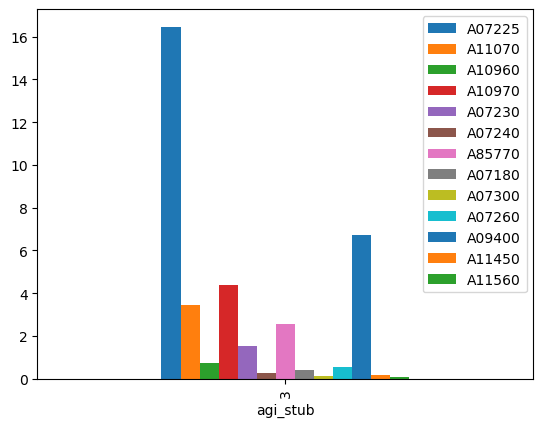

In [67]:
toBillion(mediumPeopleTaxCredits*1000).plot.bar()

graph for visual reference

## Overall Observations So Far

Overall, it seems that so far that most of the income tax brackets make a lot of money from the child dependent tax credit and recovery rebate tax credit. The top 4 brackets make a lot of money from the self-employed tax credit. The bottom two make a lot of money from the additional child tax credit. All of these are important considerations to take into consideration when designing a new tax code.

Let's go quickly get the total amount of money made from tax credits overall.

## Total Amount of Money Made From Tax Credits Overall

In [68]:
toBillion(df[TAX_CREDIT_AMT].sum().sum()*1000)

283.7

A total of around 254.8 billion dollars has been made overall from tax credits. This is certainly a large amount of money, though the total tax income for the U.S. (for 2020 at least) is around 1.6 trillion dollars which dwarfs this amount I will note, but this still is about 15% of it.

Let's now go focus on various tax credits and how much money is made from them for different tax brackets. We will explore the education tax credit first, as I think that is important to explore.

## Exploration of Education Tax Credit

In [76]:
toBillion(df['A07230'].sum()*1000)

7.72

A total of around 7.72 billion dollars has been made from the education tax credit. Let's check the education tax credit for different tax brackets.

In [77]:
toBillion(creditByTaxBracket['A07230']*1000)

agi_stub
1    0.79
2    2.61
3    1.51
4    1.01
5    1.80
6    0.00
Name: A07230, dtype: float64

The second lowest bracket makes the most amount of money from the education tax credit, making 2.61 billion dollars, while the highest bracket makes no money whatsover. these people making no money from the education tax credit is surprising, as one would expect that even they would at least use somewhat the education tax credit, as they have to educate their kids just like everyone else. Perhaps this indicates that they very heavily use private schools? The second highest bracket makes around 1.80 billion dollars from the education tax credit, the second highest amount. It seems that the second lowest bracket people probably have lots of government assistance for getting education, which is not surprising. However, I don't know why the second highest bracket people make lots of money from the education tax credit. Perhaps that should be investigated further. The lowest tax bracket makse 0.79 billion dollars from the education tax credit, the 2nd lowest amount, which is also surprising. Perhaps that too should be investigated further. Overall though it seems that for designing a new tax code Congress should not get rid of the education tax credit or else poor people will be hurt a lot, especially education-wise.

Luke Note: The reason rich people don't take advantage of the child tax credit is they legally can't since they make more than 150k. I'm pretty sure a lot of these 0's for the upper brackets is because they cannot legally do it.

<AxesSubplot: xlabel='agi_stub'>

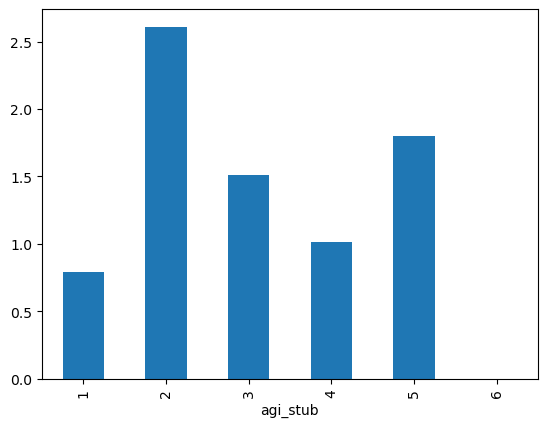

In [71]:
toBillion(creditByTaxBracket['A07230']*1000).plot.bar()

graph for visual reference

Let's move onto exploring the retirement savings contribution tax credit, which I think may have important insights to uncover.

## Exploration of Retirement Savings Contribution Tax Credit

In [72]:
toBillion(df['A07240'].sum()*1000)

1.73

Around 1.73 billion dollars total has been made from the retirement savings contribution tax credit. Let's check the tax credit for different tax brackets.

agi_stub
1    0.34
2    1.14
3    0.25
4    0.00
5    0.00
6    0.00
Name: A07240, dtype: float64

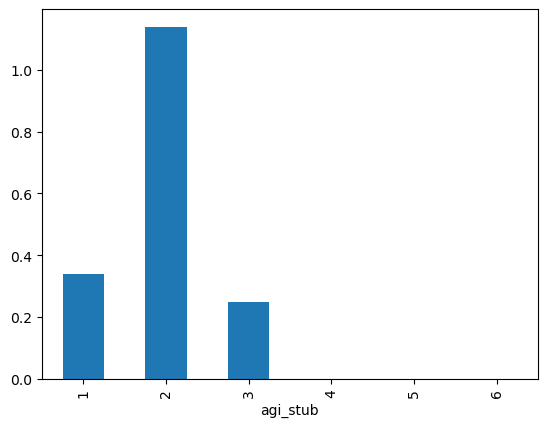

In [84]:
toBillion(creditByTaxBracket['A07240']*1000).plot.bar()
toBillion(creditByTaxBracket['A07240']*1000)

The second lowest bracket makes around 1.14 billion dollars from the retirement savings contribution tax credit, while the top 3 brackets make no money whatsover. The lowest bracket makes around 0.34 billion dollars and the third lowest makes around 0.25 billion dollars. Research by me on this tax credit indicates that these results indicate to me that somewhat rich to very rich people make too much money to be eligible for this tax credit. The lowest tax bracket people surprisingly make relatively little money from this tax credit. Perhaps their very small income makes them unable to spare money to contribute to retirement savings? Perhaps that should be investigated further if possible. The lowest bracket it seems do have the income to spare to make retirement savings contributions. Overall, it seems that for designing a new tax code Congress should not get rid of the retirement savings contribution tax credit to avoid hurting lower income people a lot.

## Exploration of Insurance Premium Tax Credit

In [74]:
toBillion(df['A85770'].sum()*1000)

28.9

Around 28.9 billion dollars has been made from the retirement savings contribution tax credit. let's check the tax credit for the various brackets.

agi_stub
1    15.08
2    11.10
3     2.55
4     0.17
5     0.00
6     0.00
Name: A85770, dtype: float64

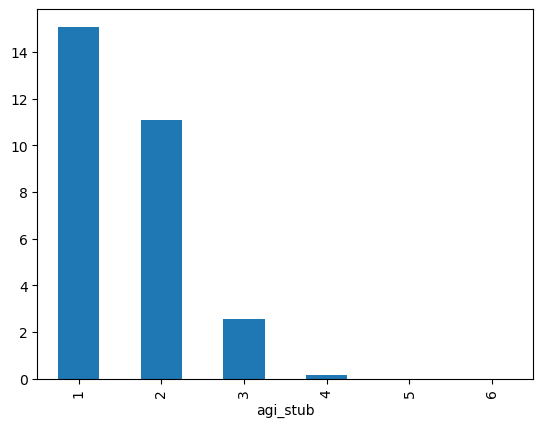

In [83]:
toBillion(creditByTaxBracket['A85770']*1000).plot.bar()
toBillion(creditByTaxBracket['A85770']*1000)

The second lowest bracket makes around 11.1 billion dollars from the Insurance Premium Tax Credit and the lowest bracket makes 15.08 billions dollars from the Insurance Premium Tax Credit. The third lowest makes around 2.55 billion dollars and the third highest makes around 170 million dollars. The other tax brackets make no money as they are above the amount of income allowed to take advantage of this. It definitely makes sense as to why the lower brackets make so much off of this since they make less, so the government gives them a lot ot purchase health insurance. This is definitely one of the bigger tax credits and Congress should consider the potentially detrimental impact on the lower tax brackets of removing this tax.

## Child/Dependent Care Tax Credit

In [78]:
toBillion(df['A07180'].sum()*1000)

2.73

agi_stub
1    0.04
2    0.66
3    0.40
4    0.35
5    0.88
6    0.40
Name: A07180, dtype: float64

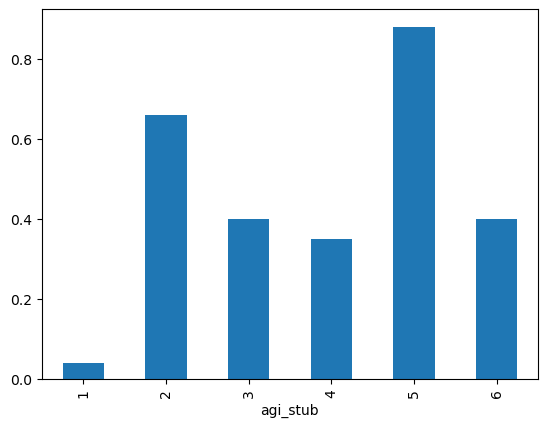

In [85]:
toBillion(creditByTaxBracket['A07180']*1000).plot.bar()
toBillion(creditByTaxBracket['A07180']*1000)

The second lowest bracket makes around 660 million dollars from the Child/Dependent Tax Credit and the lowest bracket makes 40 million dollars from it. The third lowest makes around 400 million dollars and the third highest makes around 350 million dollars. The second highest makes 880 million amd the highest makes 400 million.It definitely makes sense as to why everyone makes money off of this, namely that pretty much every bracket has children/dependents and it seems that the higher income people also are able to take advantage of this credit. It is interesting that the lowest bracket makes little off of this, though since they typically cannot afford children it makes sense. While this is useful, it is one of the smaller tax credits meaning aside from the purpose of promoting having children, this would be a credit that could be removed at little cost.

## Foreign Tax Credit

In [86]:
toBillion(df['A07300'].sum()*1000)

11.13

agi_stub
1     0.01
2     0.06
3     0.12
4     0.14
5     0.71
6    10.09
Name: A07300, dtype: float64

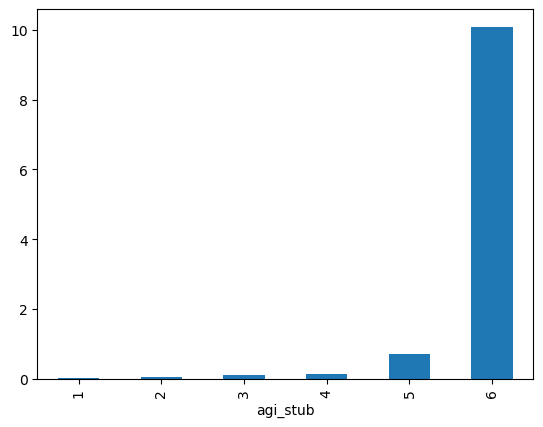

In [87]:
toBillion(creditByTaxBracket['A07300']*1000).plot.bar()
toBillion(creditByTaxBracket['A07300']*1000)

The second lowest bracket makes around 60 million dollars from the Foreign Tax Credit and the lowest bracket makes 10 million dollars from it. The third lowest makes around 120 million dollars and the third highest makes around 140 million dollars. The second highest makes 710 million amd the highest makes 10.09 billion. It definitely makes sense as to why all groups benefit from this, namely that there are internation people from each bracket, however the great difference in credit between the top bracket and the rest is quite astounding. It is true that the top tax bracket has the most to lose on foreign taxes, but with this big of a difference, it must be that they can come to the country more, since they can afford more than the other brackets. It is interesting that the lowest bracket makes so little off of this, because there is no lack of poor immigrants, but they also don't make anywhere near the same amount so this makes sense. This tax credit is very small for most groups, but for the sake of the highest tax bracket, it might be wise for this type of tax to not be overhauled.

## Additional Child Tax Credit

In [88]:
toBillion(df['A11070'].sum()*1000)

32.31

agi_stub
1    12.44
2    15.87
3     3.43
4     0.52
5     0.05
6     0.00
Name: A11070, dtype: float64

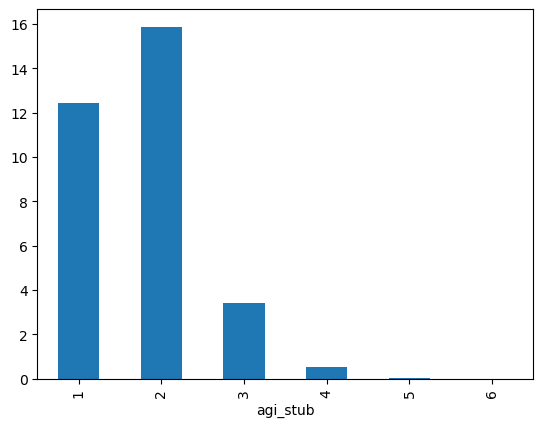

In [89]:
toBillion(creditByTaxBracket['A11070']*1000).plot.bar()
toBillion(creditByTaxBracket['A11070']*1000)

The second lowest bracket makes around 15.87 billion dollars from the Additional Child Tax Credit and the lowest bracket makes 12.44 billion dollars from it. The third lowest makes around 3.43 billion dollars and the third highest makes around 520 million dollars. The second highest makes 50 million amd the highest makes nothing from it. It is very interesting how much the bottom two brackets make from this tax credit compared to others, especially considering the lack of Child/Dependent Care in the lowest bracket. I think that a lot of this is due to fraud, as I have heard it is common for lower income individuals to claim they have additional dependents. Also, for the upper brackets, it makes sens that they get little out of this since they are actually excluded from the benefits of this, though it is also interesting to see the great different between the upper that barely qualify and the lower ones. I think that a lot of this of course has to do with large lower income families. This is one of the larger tax credits making it seem like a bad idea to do away with, however with the amoutn of fraud Congress at the very least has a reason to get rid of it.

## Residential Energy Tax Credit

In [90]:
toBillion(df['A07260'].sum()*1000)

3.18

agi_stub
1    0.01
2    0.31
3    0.55
4    0.48
5    1.21
6    0.62
Name: A07260, dtype: float64

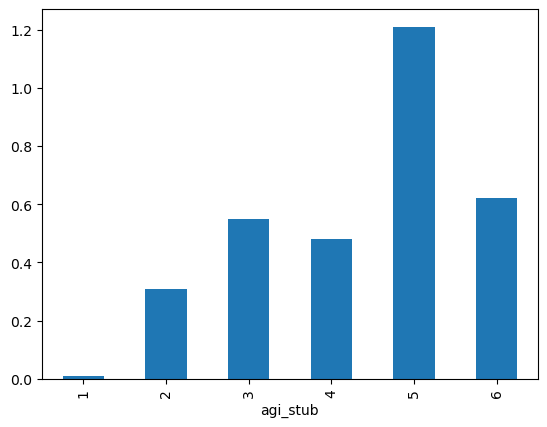

In [91]:
toBillion(creditByTaxBracket['A07260']*1000).plot.bar()
toBillion(creditByTaxBracket['A07260']*1000)

The second lowest bracket makes around 310 million dollars from the Residential Energy Tax Credit and the lowest bracket makes 10 million dollars from it. The third lowest makes around 510 million dollars and the third highest makes around 480 million dollars. The second highest makes 1.21 billion dollars and the highest makes 620 million dollars from it.  These numbers are unsuprising since the higher income individuals tend to be able to afford houses first of all, and also efficient energy. In the case of the lowest bracket, it is unsurprising that there is so little since they generally cannot afford houses to the extent of the higher brackets. It was also very interesting that the second highest bracket was so much higher than the other brackets, but maybe the highest bracket people are indifferent to this small tax credit while the people below them can both afford it and could use that extra money. Overall this, isn't a particularly large form of tax credit meaning that if Congress really wants to, they can get rid of this tax credit.

## Self Employment Tax Credit

In [92]:
toBillion(df['A09400'].sum()*1000)

64.47

agi_stub
1     9.46
2     8.88
3     6.72
4     5.34
5    13.68
6    20.39
Name: A09400, dtype: float64

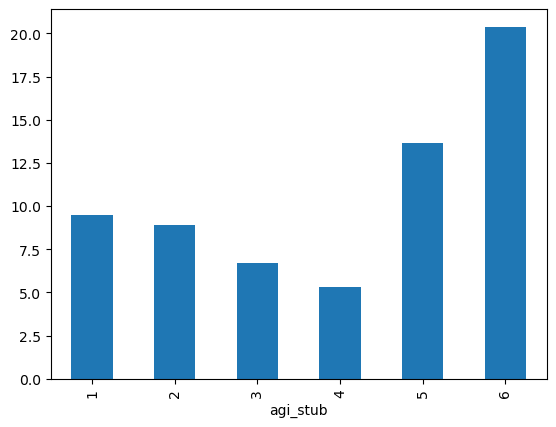

In [93]:
toBillion(creditByTaxBracket['A09400']*1000).plot.bar()
toBillion(creditByTaxBracket['A09400']*1000)

The second lowest bracket makes around 8.88 billion dollars from the Self Employment Tax Credit and the lowest bracket makes 9.46 billion dollars from it. The third lowest makes around 6.72 billion dollars and the third highest makes around 5.34 billion dollars. The second highest makes 13.68 billion dollars and the highest makes 20.39 billion dollars from it.  These numbers are very intersting since they do not have a generic trend that is followed, instead it goes high to low to very high. It makes sense that the higher income individuals get more from this tax credit since self employed people can easily make more than their counterparts as well owning businesses. In the case of the lower brackets it is interesting to see faairly high numbers. Self employed people do not make a salary though, so there is no gurantee that they will make money doing what they are doing which is why I think the lower brackets have so many self employed people. I think congress should definitely consider keeping this since it affects pretty much all people greatly.

## Refundable Education Tax Credit

In [94]:
toBillion(df['A10960'].sum()*1000)

5.47

agi_stub
1    1.91
2    1.34
3    0.72
4    0.47
5    1.03
6    0.00
Name: A10960, dtype: float64

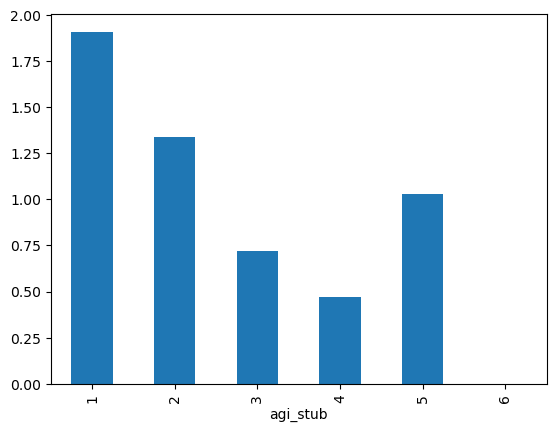

In [96]:
toBillion(creditByTaxBracket['A10960']*1000).plot.bar()
toBillion(creditByTaxBracket['A10960']*1000)

The second lowest bracket makes around 1.34 billion dollars from the Refundable Eduction Tax Credit and the lowest bracket makes 1.91 billion dollars from it. The third lowest makes around 720 million dollars and the third highest makes around 470 million dollars. The second highest makes 1.03 billion dollars and the highest makes nothing from it.  These numbers are very interesting since they do not have a generic trend that is followed, instead it goes very high to low to high. It makes sense that these numbers are as they are since college students do not make all that much money and will likely be in some of the lower brackets. It is definitely interesting that there are so many in the second highest bracket, though this might mean there are some people who make a lot of money while going to college. it also makes sense that noone in the highest bracket makes money since they cannot from this tax credit. Overal this is a reasonably important tax credit though, it does not have much money behind it meaning it could theoretically be removed, but since it hurts the lower income people a lot, it probably shouldn't be.

## Sick/Family Leave Tax Credit

In [97]:
toBillion(df['A11450'].sum()*1000)

1.46

agi_stub
1    0.60
2    0.41
3    0.18
4    0.07
5    0.15
6    0.05
Name: A11450, dtype: float64

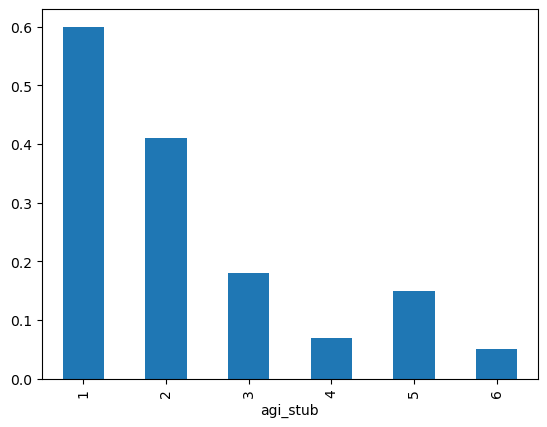

In [98]:
toBillion(creditByTaxBracket['A11450']*1000).plot.bar()
toBillion(creditByTaxBracket['A11450']*1000)

The second lowest bracket makes around 410 million dollars from the Sick/Parental Leave Tax Credit and the lowest bracket makes 600 million dollars from it. The third lowest makes around 180 million dollars and the third highest makes around 70 million dollars. The second highest makes 150 million dollars and the highest makes 50 million dollars.  These numbers show that lower income individuals make more from this tax credit. It is interesting to me that low income individuals are so greatly affected by sick/parental leave especially with regard to their higher income counterparts. Overal this is not a very important tax credit as it does not have much money behind it meaning it could theoretically be removed, but since it hurts the lower income people a lot when on parental leave, it probably shouldn't be.

## Recovery Rebate Tax Credit

In [99]:
toBillion(df['A10970'].sum()*1000)

39.64

agi_stub
1    18.58
2     8.03
3     4.38
4     2.74
5     5.90
6     0.01
Name: A10970, dtype: float64

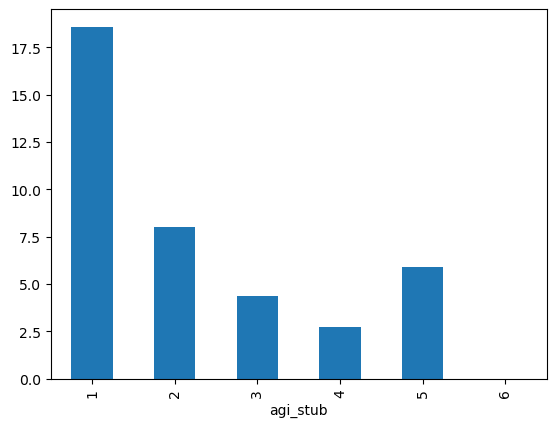

In [100]:
toBillion(creditByTaxBracket['A10970']*1000).plot.bar()
toBillion(creditByTaxBracket['A10970']*1000)

The second lowest bracket makes around 8.03 billion dollars from the Recovery Rebate Tax Credit and the lowest bracket makes 18.58 billion dollars from it. The third lowest makes around 4.38 billion dollars and the third highest makes around 2.74 billion dollars. The second highest makes 5.9 billion dollars and the highest makes 10 million dollars.  These numbers show that lower income individuals make more from this tax credit. It is interesting to me that low income individuals got so much money as compensation for covid with regards to their higher income counterparts since I thought this was aimed at all adults. Even so, there was a limit on how much higher income people could get from it, so the trend at the very least makes sense. Overall this is not a very important tax credit since covid isn't as problematic as it used to be (this also wasn't made to be repeated) so there is no reason for this tax credit to remain.